In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading dataset
from sklearn.datasets import load_breast_cancer 

In [2]:
cancer_data = load_breast_cancer()


In [3]:
cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
cancer_data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

In [5]:
cancer_data['data'].shape

(569, 30)

In [6]:
df = pd.DataFrame(np.c_[cancer_data['data'],cancer_data['target']],columns = np.append(cancer_data['feature_names'],['target']))
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


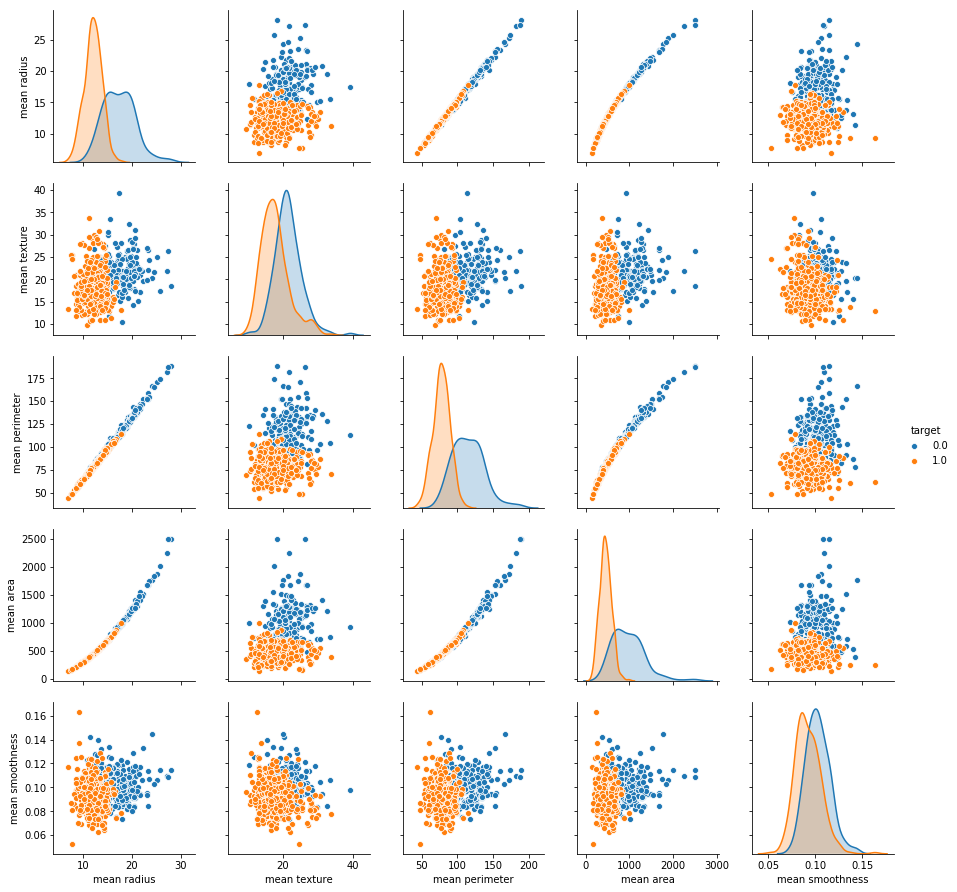

In [7]:
sns.pairplot(df, hue='target', vars=['mean radius','mean texture','mean perimeter','mean area','mean smoothness'])
plt.show()

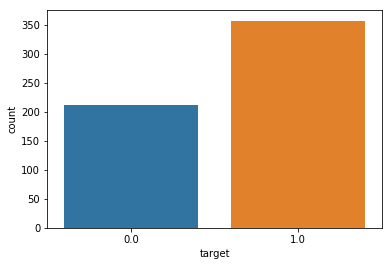

In [8]:
sns.countplot(df['target'])
plt.show()

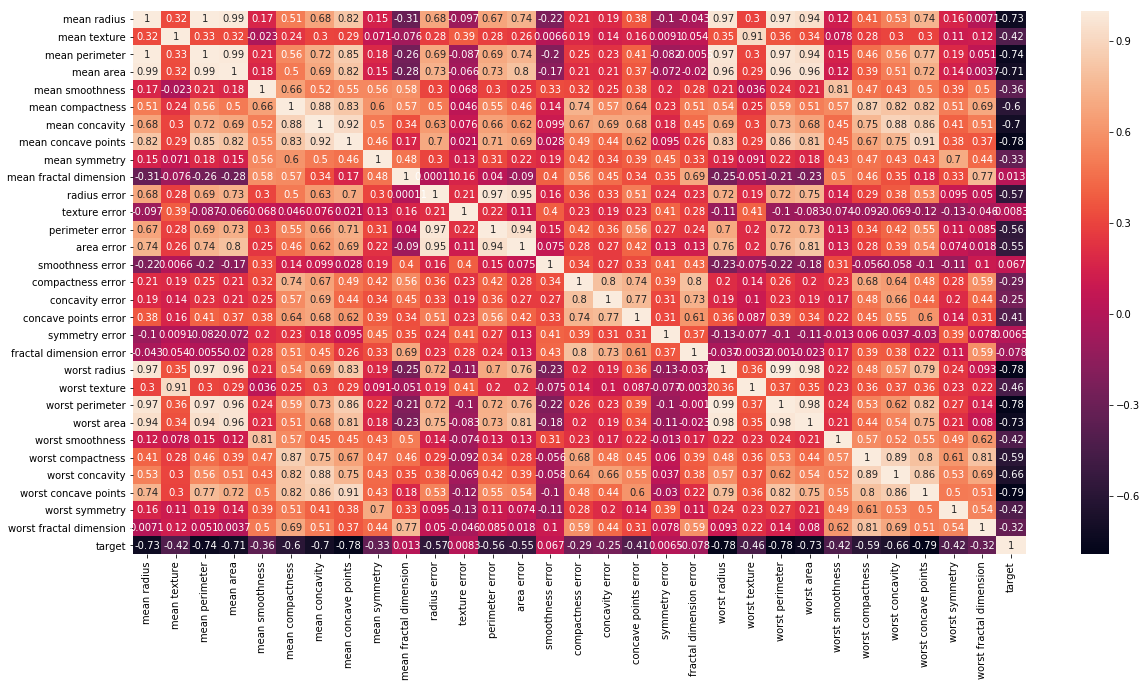

In [9]:
# for correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)   # annot ,bcz we want to plot values/numbers as well.
plt.show()

In [10]:
x = df.drop(['target'], axis=1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y = df['target']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [12]:
# spliting dataset for training and testing
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
svc_model = SVC()
svc_model.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
# Evaluating Model

y_predict = svc_model.predict(xtest)
y_predict

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

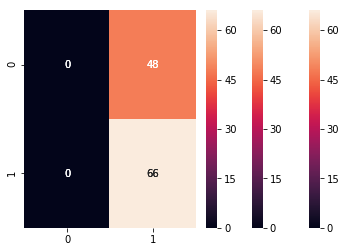

In [19]:
cm = confusion_matrix(ytest,y_predict)
sns.heatmap(cm, annot=True)
plt.show()


In [21]:
#normalisation on train
min_train = xtrain.min()
range_train = (xtrain-min_train).max()
x_train_scaled = (xtrain-min_train)/range_train

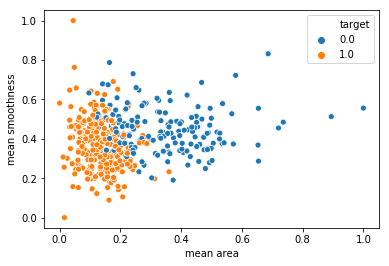

In [22]:
sns.scatterplot(x= x_train_scaled['mean area'], y=x_train_scaled['mean smoothness'], hue=ytrain)
plt.show()

In [20]:
#normalisation on test
min_test = xtest.min()
range_test = (xtest-min_test).max()
x_test_scaled = (xtest-min_test)/range_test

In [23]:
svc_model.fit(x_train_scaled,ytrain)
y_predict = svc_model.predict(x_test_scaled)

y_predict

array([ 0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,
        0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,
        0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.])

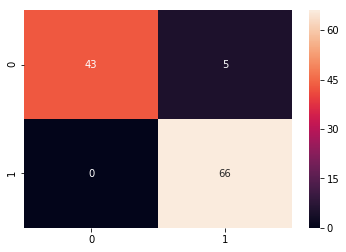

In [24]:
cm = confusion_matrix(ytest,y_predict)
sns.heatmap(cm, annot=True)
plt.show()

In [25]:
# classification report  --> summary of performance

print(classification_report(ytest, y_predict))


             precision    recall  f1-score   support

        0.0       1.00      0.90      0.95        48
        1.0       0.93      1.00      0.96        66

avg / total       0.96      0.96      0.96       114



In [26]:
# c and gamma parameter tuning

param_grid = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001], 'kernel':['rbf']}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(x_train_scaled,ytrain)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6381578947368421, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV]  C=0.1, gamma=0.001, kernel=rbf, score=0.6423841059602649, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.993421052631579, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV]  C=1, gamma=1, kernel=rbf, score=0.9801324503311258, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [27]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

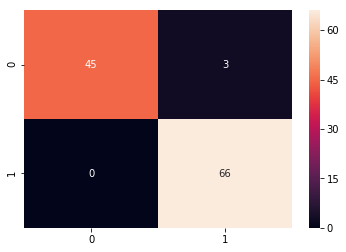


             precision    recall  f1-score   support

        0.0       1.00      0.94      0.97        48
        1.0       0.96      1.00      0.98        66

avg / total       0.97      0.97      0.97       114



In [29]:
grid_prediction = grid.predict(x_test_scaled)
cm = confusion_matrix(ytest, grid_prediction)

sns.heatmap(cm, annot=True)
plt.show()
print()
print(classification_report(ytest, grid_prediction))